In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [3]:
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

# Загрузка данных

In [4]:
train_df = pd.read_csv('kursach_dir/train.csv').set_index(['Id','DistrictId'])
test_df = pd.read_csv('kursach_dir/test.csv').set_index(['Id','DistrictId'])

Вывод информации о данных

In [ ]:
colours = ['#000099', '#ffff00']
sns.heatmap(train_df.isnull(), cmap=sns.color_palette(colours))

Процентная потеря данных и типы данных  

In [6]:
print('Пропуск данных\n')
for col in train_df.columns:
    pct_missing = np.mean(train_df[col].isnull())
    print('{:15} - {:3}%   {}'.format(col, round(pct_missing*100), train_df[col].dtypes))

Пропуск данных

Rooms           -   0%   float64
Square          -   0%   float64
LifeSquare      -  21%   float64
KitchenSquare   -   0%   float64
Floor           -   0%   int64
HouseFloor      -   0%   float64
HouseYear       -   0%   int64
Ecology_1       -   0%   float64
Ecology_2       -   0%   object
Ecology_3       -   0%   object
Social_1        -   0%   int64
Social_2        -   0%   int64
Social_3        -   0%   int64
Healthcare_1    -  48%   float64
Helthcare_2     -   0%   int64
Shops_1         -   0%   int64
Shops_2         -   0%   object
Price           -   0%   float64


In [7]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Номинативные переменные

In [8]:
object_titel = train_df.select_dtypes(include='object').columns.tolist()

In [9]:
for obj in object_titel:
    print(train_df[obj].value_counts(normalize=True), end = '\n\n')

B    0.9903
A    0.0097
Name: Ecology_2, dtype: float64

B    0.9725
A    0.0275
Name: Ecology_3, dtype: float64

B    0.9175
A    0.0825
Name: Shops_2, dtype: float64



# Работа с данными

По параметру Healthcare_1 слишком большой процен утери данных, поэтому убираю его из выборки

In [10]:
train_df.drop (columns='Healthcare_1', axis= 1 , inplace= True )

заполнение LifeSquare средним

In [11]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['LifeSquare'].median()

Устранение выбросов по LifeSquare, Rooms, Square, KitchenSquare

До устранения выбросов

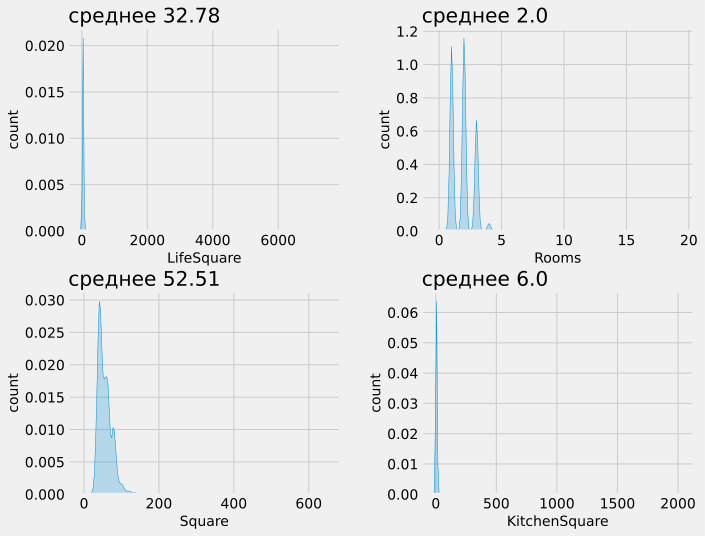

In [12]:
plt.figure(figsize = (10, 8))

plt.subplot(221)
#train_df['LifeSquare'].hist()
sns.kdeplot(train_df['LifeSquare'], fill=True, legend=False)
plt.ylabel('count')
plt.xlabel('LifeSquare')
plt.title('среднее {:.4}'.format(train_df['LifeSquare'].median()), loc='left')

plt.subplot(222)
#train_df['Rooms'].hist()
sns.kdeplot(train_df['Rooms'], fill=True, legend=False)
plt.ylabel('count')
plt.xlabel('Rooms')
plt.title('среднее {:.4}'.format(train_df['Rooms'].median()), loc='left')

plt.subplot(223)
#train_df['Square'].hist()
sns.kdeplot(train_df['Square'], fill=True, legend=False)
plt.ylabel('count')
plt.xlabel('Square')
plt.title('среднее {:.4}'.format(train_df['Square'].median()), loc='left')

plt.subplot(224)
#train_df['KitchenSquare'].hist()
sns.kdeplot(train_df['KitchenSquare'], fill=True, legend=False)
plt.ylabel('count')
plt.xlabel('KitchenSquare')
plt.title('среднее {:.4}'.format(train_df['KitchenSquare'].median()), loc='left')

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [13]:
train_df.loc[train_df['LifeSquare'] > 300, 'LifeSquare'] = train_df['LifeSquare'].median() 
train_df.loc[~train_df['Rooms'].isin(range(1,6)), 'Rooms'] = train_df['Rooms'].median()
train_df.loc[train_df['Square'] > 500, 'Square'] = train_df['Square'].median()
train_df.loc[train_df['KitchenSquare'] > 60, 'KitchenSquare'] = train_df['KitchenSquare'].median()
train_df.loc[train_df['KitchenSquare'] < 2, 'KitchenSquare'] = train_df['KitchenSquare'].median()

После устранения

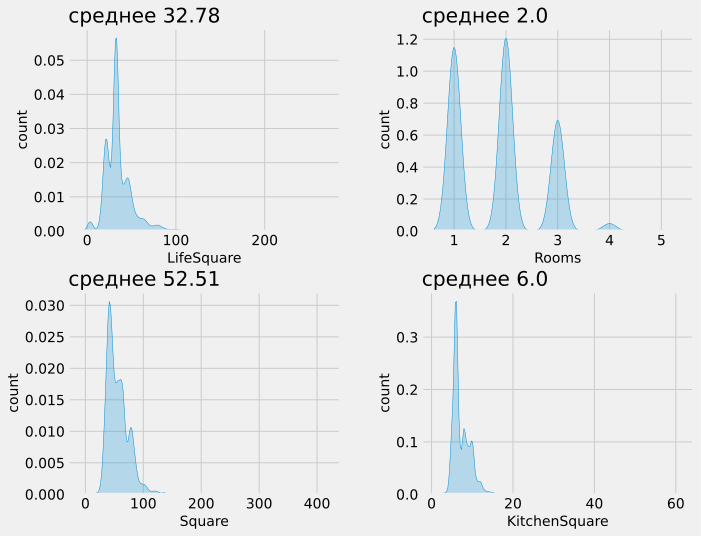

In [14]:
plt.figure(figsize = (10, 8))

plt.subplot(221)
#train_df['LifeSquare'].hist()
sns.kdeplot(train_df['LifeSquare'], fill=True, legend=False)
plt.ylabel('count')
plt.xlabel('LifeSquare')
plt.title('среднее {:.4}'.format(train_df['LifeSquare'].median()), loc='left')

plt.subplot(222)
#train_df['Rooms'].hist()
sns.kdeplot(train_df['Rooms'], fill=True, legend=False)
plt.ylabel('count')
plt.xlabel('Rooms')
plt.title('среднее {:.4}'.format(train_df['Rooms'].median()), loc='left')

plt.subplot(223)
#train_df['Square'].hist()
sns.kdeplot(train_df['Square'], fill=True, legend=False)
plt.ylabel('count')
plt.xlabel('Square')
plt.title('среднее {:.4}'.format(train_df['Square'].median()), loc='left')

plt.subplot(224)
#train_df['KitchenSquare'].hist()
sns.kdeplot(train_df['KitchenSquare'], fill=True, legend=False)
plt.ylabel('count')
plt.xlabel('KitchenSquare')
plt.title('среднее {:.4}'.format(train_df['KitchenSquare'].median()), loc='left')

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

Избавляюсь от нольэтажных домов, и домов из будущего

In [15]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()
train_df.loc[train_df['HouseYear'] >2023, 'HouseYear'] = train_df['HouseYear'].median()

Преобразую в бинарные призника

In [16]:
for obj in object_titel:
    train_df[obj] = train_df[obj].replace({'A':0, 'B':1})

Избавляемя от случаев неправильного указания этажей и площадей

In [17]:
train_df.loc[train_df['HouseFloor'] < train_df['Floor'], 'Floor'] = \
train_df.loc[train_df['HouseFloor'] < train_df['Floor'], 'HouseFloor']

In [18]:
train_df.loc[train_df['Square'] < (train_df['KitchenSquare'] + train_df['LifeSquare']), 'Square'] = \
train_df.loc[train_df['Square'] < (train_df['KitchenSquare'] + train_df['LifeSquare']), 'KitchenSquare'] + \
train_df.loc[train_df['Square'] < (train_df['KitchenSquare'] + train_df['LifeSquare']), 'LifeSquare']

In [21]:
Y_train = pd.DataFrame(train_df['Price'])

In [22]:
Y_train.head()

,,Price
Id,DistrictId,
14038,35,184966.930730
15053,41,300009.450063
4765,53,220925.908524
5809,58,175616.227217
10783,99,150226.531644


In [32]:
x_train_df = pd.DataFrame(train_df.loc[:, train_df.columns != 'Price'])

In [37]:
x_train_df.head()

,,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
Id,DistrictId,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,0,11,1
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,1,16,1
4765,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,1,1,34,7759,0,1,3,1
5809,58,2.0,61.731512,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,0,5,1
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2,4,1


In [30]:
scaler = StandardScaler()

In [34]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_df), columns=x_train_df.columns)

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, Y_train, train_size=0.70, random_state=42)

In [66]:
model = RandomForestRegressor(n_estimators=500, max_depth=12, random_state=42)

In [67]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=500, random_state=42)

In [68]:
y_train_preds = model.predict(X_train)
y_valid_preds = model.predict(X_valid)

In [69]:
check_valid = pd.DataFrame({
    'Тестовые данные valid': y_valid.values[:, 0], 
    'Предсказание valid': y_valid_preds})

check_train = pd.DataFrame({
    'Тестовые данные train': y_train.values[:, 0], 
    'Предсказание train': y_train_preds})

In [70]:
r2_score(check_valid['Тестовые данные valid'], check_valid['Предсказание valid'])

0.7032729770876911

In [71]:
r2_score(check_train['Тестовые данные train'], check_train['Предсказание train'])

0.8985500168372904

# Работа с тестовыми данными

In [72]:
test_df.drop (columns='Healthcare_1', axis= 1 , inplace= True )
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = test_df['LifeSquare'].median()
test_df.loc[test_df['LifeSquare'] > 300, 'LifeSquare'] = test_df['LifeSquare'].median() 
test_df.loc[~test_df['Rooms'].isin(range(1,6)), 'Rooms'] = test_df['Rooms'].median()
test_df.loc[test_df['Square'] > 500, 'Square'] = test_df['Square'].median()
test_df.loc[test_df['KitchenSquare'] > 60, 'KitchenSquare'] = test_df['KitchenSquare'].median()
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()
test_df.loc[test_df['HouseYear'] >2023, 'HouseYear'] = test_df['HouseYear'].median()
for obj in object_titel:
    test_df[obj] = test_df[obj].replace({'A':0, 'B':1})
test_df.loc[test_df['HouseFloor'] < test_df['Floor'], 'Floor'] = \
test_df.loc[test_df['HouseFloor'] < test_df['Floor'], 'HouseFloor']
test_df.loc[test_df['Square'] < (test_df['KitchenSquare'] + test_df['LifeSquare']), 'Square'] = \
test_df.loc[test_df['Square'] < (test_df['KitchenSquare'] + test_df['LifeSquare']), 'KitchenSquare'] + \
test_df.loc[test_df['Square'] < (test_df['KitchenSquare'] + test_df['LifeSquare']), 'LifeSquare']

In [73]:
test_df

,,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
Id,DistrictId,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,0,0,1
15856,74,2.0,69.263183,32.925087,1.0,1,1.0,1977,0.075779,1,1,6,1437,3,0,2,1
5480,190,1.0,27.948246,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,5,5,1
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,3,3,1
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1,1,36,5992,0,1,1,1
4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1,1,1,264,0,0,1,1
5783,12,3.0,77.842178,48.282625,9.0,22,22.0,1989,0.090799,1,1,74,19083,2,5,15,1


In [74]:
X_test = test_df
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [75]:
y_test_preds = pd.DataFrame({
    'Price': model.predict(X_test_scaled)})


In [76]:
y_test_preds

,Price
0,161932.138440
1,200353.954987
2,234677.142834
3,313861.119272
4,132044.356213
...,...
4995,246670.219320
4996,124478.913625
4997,322968.655279
4998,218297.686478


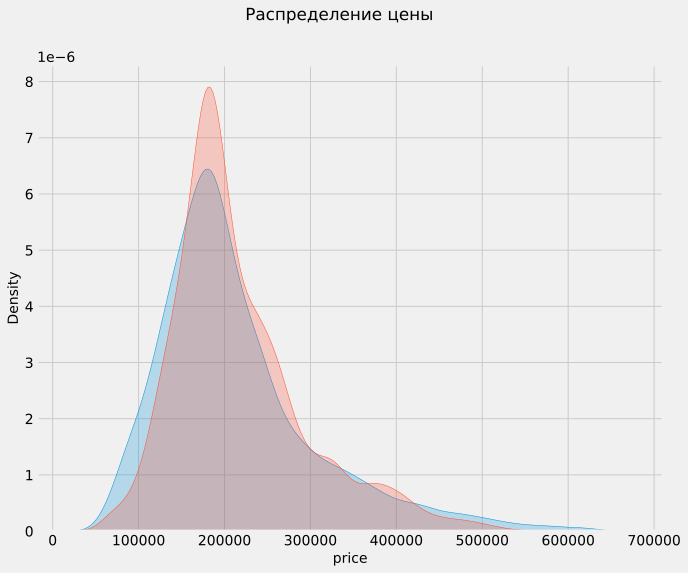

In [77]:
plt.figure(figsize = (10, 8))

sns.kdeplot(train_df['Price'], fill=True)
sns.kdeplot(y_test_preds['Price'], fill=True)
plt.xlabel('price')

plt.suptitle('Распределение цены')
plt.show()

In [79]:
y_test_preds.to_csv (r'!price_predict.csv', index= False )